In [101]:
import pandas as pd
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt

$$ \text{Average:    } TD_{c_1 \cup c_2} = \sum_{x \ in c_1 \cup c_2}D(x,\mu_{c_1 \cup c_2})^2$$

$$ \text{Ward's Method:    } D(c_1,c_2) = \frac{1}{|c_1|}\frac{1}{|c_2|}\sum_{x_1 \in c_1}\sum_{x_2 \in c_2} D(x_1,x_2)$$

In [102]:
# List of tickers for the 30 companies
# custom_tickers = [
#     "AMZN", "AXP", "AMGN", "AAPL", "BA",
#     "CAT", "CSCO", "CVX", "GS", "HD",
#     "HON", "IBM", "INTC", "JNJ", "KO",
#     "JPM", "MCD", "MMM", "MRK", "MSFT",
#     "NKE", "PG", "TRV", "UNH", "CRM",
#     "VZ", "V", "WMT", "DIS", "DJI"
# ]

#PAST DJIA
custom_tickers = [
    "PG", "JNJ", "XOM", "CVX", "MRK", "PFE", "MCD", "T",
    "VZ", "HPQ", "IBM", "MSFT", "INTC", "HD", "WMT", "TRV",
    "RTX", "BA", "AA", "DD", "CAT", "MMM", "DIS", "JPM", "AXP", "GE",
    "CCEP"
    #"CRJ", "H", "BOA",
]


# Fetch data for each ticker
stock_data = {}
for ticker in custom_tickers:
    try:
        data = get_data(ticker)
        stock_data[ticker] = data
    except AssertionError as e:
        print(f"No data found for {ticker}: {e}")

# Print the first few rows of the data for each ticker
for ticker in custom_tickers:
    if ticker in stock_data:
        print(f"Stock data for {ticker}:")
        print(stock_data[ticker].head())
        print("\n")

def calculate_weekly_returns(df):
    weekly_df = df.resample('W').last()
    weekly_df['close'].fillna(method='ffill', inplace=True)
    weekly_df['returns'] = weekly_df['close'].pct_change().fillna(0)
    return weekly_df

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data = data.loc['2001-01-02':'2013-05-14']
    data.index = pd.to_datetime(data.index)
    weekly_returns = calculate_weekly_returns(data)
    weekly_returns_dict[ticker] = weekly_returns

# for i in custom_tickers:
#     print(i)
#     plt.plot(weekly_returns_dict[i].index,weekly_returns_dict[i]["close"])
#     plt.show()

Stock data for PG:
                open      high       low     close  adjclose   volume ticker
1970-03-25  1.675781  1.761719  1.675781  1.703125  0.378553  1760000     PG
1970-03-26  1.703125  1.714844  1.695313  1.703125  0.378553   422400     PG
1970-03-30  1.687500  1.687500  1.660156  1.683594  0.374212   531200     PG
1970-03-31  1.683594  1.703125  1.681641  1.703125  0.378553   243200     PG
1970-04-01  1.718750  1.734375  1.718750  1.726563  0.383762   806400     PG


Stock data for JNJ:
                open      high       low     close  adjclose   volume ticker
1970-03-25  1.062500  1.100694  1.062500  1.086806  0.337554  2275200    JNJ
1970-03-26  1.086806  1.093750  1.083333  1.086806  0.337554   936000    JNJ
1970-03-30  1.086806  1.092014  1.079861  1.081597  0.335937  1368000    JNJ
1970-03-31  1.076389  1.076389  1.065972  1.072917  0.333240   676800    JNJ
1970-04-01  1.069444  1.069444  1.062500  1.065104  0.330814   820800    JNJ


Stock data for XOM:
             

/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_24823/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_24823/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_24823/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_24823/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Us

In [103]:
study_periods = [
    ('2001-01-02', '2004-01-06'),
    ('2004-01-06', '2007-01-02'),
    ('2007-01-02', '2010-01-05'),
    ('2010-01-05', '2013-05-14')
]

weekly_returns_dict = {}

for ticker, data in stock_data.items():
    data.index = pd.to_datetime(data.index)
    
    for period_num, (start_date, end_date) in enumerate(study_periods, start=1):
        period_data = data.loc[start_date:end_date]
        period_returns = calculate_weekly_returns(period_data)
        weekly_returns_dict.setdefault(ticker, {})[f'period_{period_num}'] = period_returns

period_dfs = {}

# Iterate over the periods
for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    # Initialize an empty dictionary to store data for the current period
    period_data = {}
    
    # Iterate over each ticker's data
    for ticker, data in weekly_returns_dict.items():
        # Drop NaN values from the 'close' column for the current period
        close_prices = data[period][['returns']].dropna()
        period_data[ticker] = close_prices
    
    # Concatenate the data for all tickers into a single DataFrame for the current period
    period_df = pd.concat(period_data, axis=1)
    period_dfs[period] = period_df.dropna(axis=1)

correlation_matrices = {}

# Iterate over the periods
for period, period_df in period_dfs.items():
    # Calculate correlation matrix for the current period and store it in the dictionary
    correlation_matrices[period] = period_df.corr()


/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_24823/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_24823/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_24823/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_df['close'].fillna(method='ffill', inplace=True)
/var/folders/qv/s15t9cc14msdptw315qfkxm40000gn/T/ipykernel_24823/2721064948.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Us

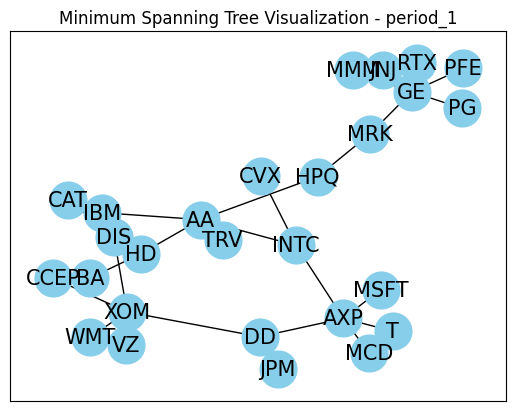

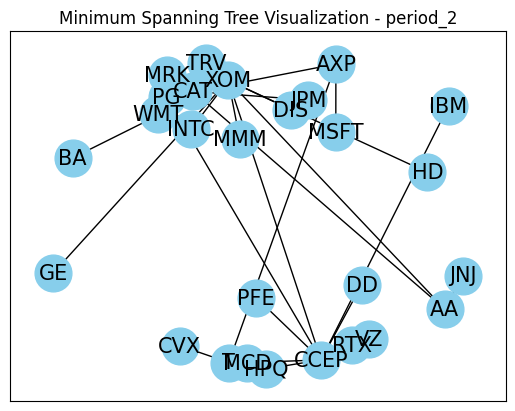

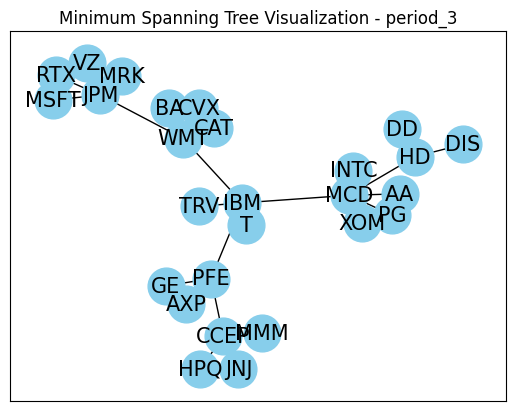

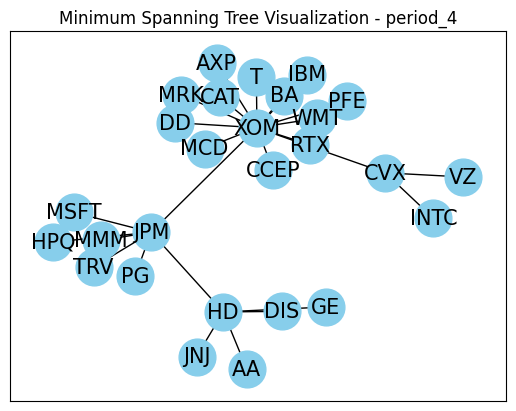

In [104]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

for period in ['period_1', 'period_2', 'period_3', 'period_4']:
    distance_matrix = correlation_matrices[period]
    tickers = sorted(set([index[0] for index in distance_matrix]))
    labels = {i: ticker for i, ticker in enumerate(tickers)}

    # Convert the distance matrix to a sparse matrix
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, edge_color='k')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
    plt.title(f"Minimum Spanning Tree Visualization - {period}")
    plt.show()


all tickers:  ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'T', 'TRV', 'VZ', 'WMT', 'XOM']
ticker labels: {0: 'AA', 1: 'AXP', 2: 'BA', 3: 'CAT', 4: 'CCEP', 5: 'CVX', 6: 'DD', 7: 'DIS', 8: 'GE', 9: 'HD', 10: 'HPQ', 11: 'IBM', 12: 'INTC', 13: 'JNJ', 14: 'JPM', 15: 'MCD', 16: 'MMM', 17: 'MRK', 18: 'MSFT', 19: 'PFE', 20: 'PG', 21: 'RTX', 22: 'T', 23: 'TRV', 24: 'VZ', 25: 'WMT', 26: 'XOM'}
communities:  ({0, 1, 2, 3, 4, 5, 13, 14, 16, 17, 18, 19, 20, 21, 26}, {6, 7, 8, 9, 10, 11, 12, 15, 22, 23, 24, 25})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'XOM'], 2: ['DD', 'DIS', 'GE', 'HD', 'HPQ', 'IBM', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'WMT']}, 4: {}, 8: {}}
breaking


/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


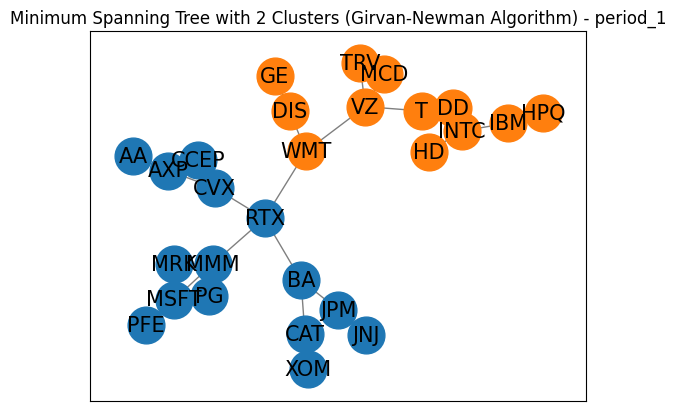

communities:  ({0, 1, 4, 5, 16, 17, 18, 19, 20, 21}, {2, 3, 13, 14, 26}, {6, 7, 8, 9, 10, 11, 12, 15, 22, 23, 24, 25})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'XOM'], 2: ['DD', 'DIS', 'GE', 'HD', 'HPQ', 'IBM', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'WMT']}, 4: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX'], 2: ['BA', 'CAT', 'JNJ', 'JPM', 'XOM'], 3: ['DD', 'DIS', 'GE', 'HD', 'HPQ', 'IBM', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'WMT']}, 8: {}}
communities:  ({0, 1, 4, 5, 16, 17, 18, 19, 20, 21}, {2, 3, 13, 14, 26}, {6, 9, 10, 11, 12, 22}, {7, 8, 15, 23, 24, 25})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'XOM'], 2: ['DD', 'DIS', 'GE', 'HD', 'HPQ', 'IBM', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'WMT']}, 4: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX'], 2: ['BA', 'CAT', 'JNJ', 'JPM', 'XOM'], 3:

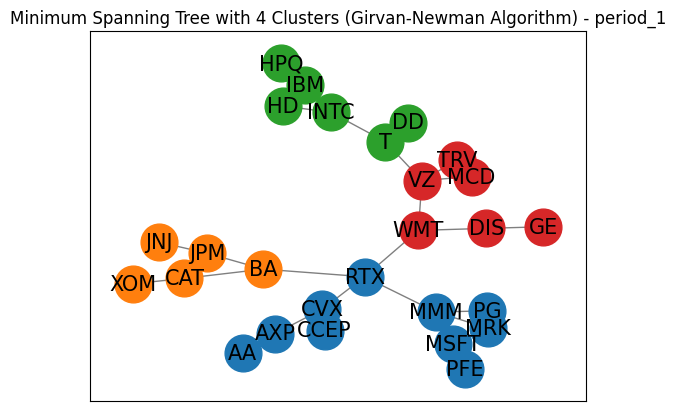

communities:  ({0, 1, 4, 5, 21}, {2, 3, 13, 14, 26}, {6, 9, 10, 11, 12, 22}, {7, 8, 15, 23, 24, 25}, {16, 17, 18, 19, 20})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'XOM'], 2: ['DD', 'DIS', 'GE', 'HD', 'HPQ', 'IBM', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'WMT']}, 4: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX'], 2: ['BA', 'CAT', 'JNJ', 'JPM', 'XOM'], 3: ['DD', 'HD', 'HPQ', 'IBM', 'INTC', 'T'], 4: ['DIS', 'GE', 'MCD', 'TRV', 'VZ', 'WMT']}, 8: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'RTX'], 2: ['BA', 'CAT', 'JNJ', 'JPM', 'XOM'], 3: ['DD', 'HD', 'HPQ', 'IBM', 'INTC', 'T'], 4: ['DIS', 'GE', 'MCD', 'TRV', 'VZ', 'WMT'], 5: ['MMM', 'MRK', 'MSFT', 'PFE', 'PG']}}
communities:  ({0, 1, 4, 5, 21}, {2, 3, 13, 14, 26}, {6, 9, 10, 11, 12, 22}, {8, 25, 7}, {24, 23, 15}, {16, 17, 18, 19, 20})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', '

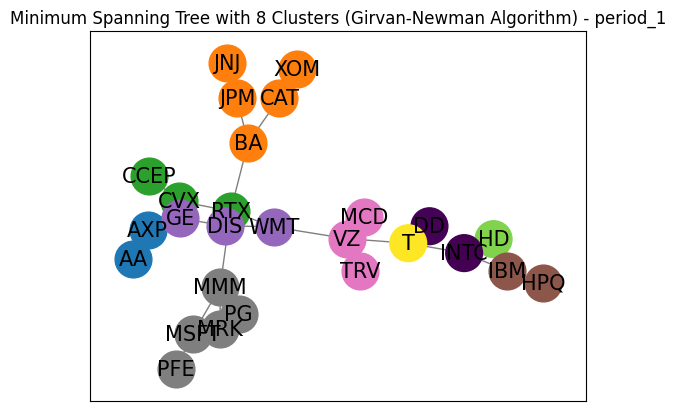

communities:  ({0, 4, 5, 6, 7, 8, 9, 12, 15, 22, 23, 24, 26}, {1, 2, 3, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 25})
cluster stocks: {2: {1: ['AA', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'XOM'], 2: ['AXP', 'BA', 'CAT', 'HPQ', 'IBM', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'WMT']}, 4: {}, 8: {}}
breaking


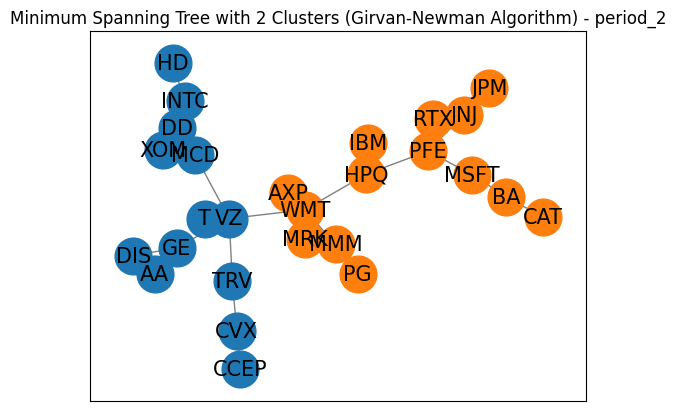

communities:  ({0, 4, 5, 6, 7, 8, 9, 12, 15, 22, 23, 24, 26}, {1, 10, 11, 16, 17, 20, 25}, {2, 3, 13, 14, 18, 19, 21})
cluster stocks: {2: {1: ['AA', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'XOM'], 2: ['AXP', 'BA', 'CAT', 'HPQ', 'IBM', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'WMT']}, 4: {1: ['AA', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'XOM'], 2: ['AXP', 'HPQ', 'IBM', 'MMM', 'MRK', 'PG', 'WMT'], 3: ['BA', 'CAT', 'JNJ', 'JPM', 'MSFT', 'PFE', 'RTX']}, 8: {}}
communities:  ({0, 4, 5, 7, 8, 22, 23, 24}, {1, 10, 11, 16, 17, 20, 25}, {2, 3, 13, 14, 18, 19, 21}, {6, 9, 12, 15, 26})
cluster stocks: {2: {1: ['AA', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'XOM'], 2: ['AXP', 'BA', 'CAT', 'HPQ', 'IBM', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'WMT']}, 4: {1: ['AA', 'CCEP', 'CVX', 'DIS', 'GE', 'T', 'TRV', 'VZ'], 2: ['AXP', 'HPQ', 'IBM', 'MMM', 'MRK', 'PG', 'WMT'], 3: ['B

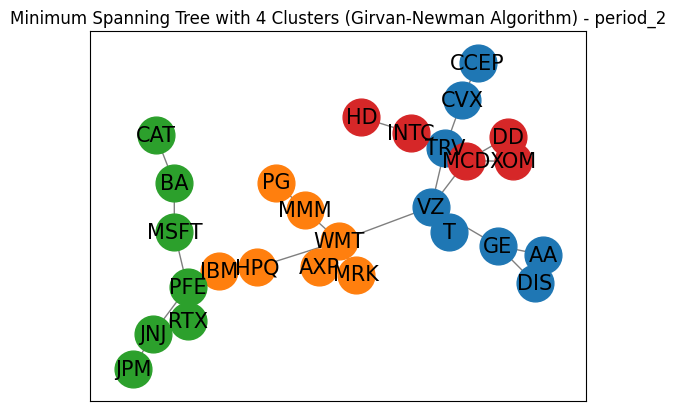

communities:  ({0, 8, 7}, {1, 10, 11, 16, 17, 20, 25}, {2, 3, 13, 14, 18, 19, 21}, {4, 5, 22, 23, 24}, {6, 9, 12, 15, 26})
cluster stocks: {2: {1: ['AA', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'XOM'], 2: ['AXP', 'BA', 'CAT', 'HPQ', 'IBM', 'JNJ', 'JPM', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'WMT']}, 4: {1: ['AA', 'CCEP', 'CVX', 'DIS', 'GE', 'T', 'TRV', 'VZ'], 2: ['AXP', 'HPQ', 'IBM', 'MMM', 'MRK', 'PG', 'WMT'], 3: ['BA', 'CAT', 'JNJ', 'JPM', 'MSFT', 'PFE', 'RTX'], 4: ['DD', 'HD', 'INTC', 'MCD', 'XOM']}, 8: {1: ['AA', 'GE', 'DIS'], 2: ['AXP', 'HPQ', 'IBM', 'MMM', 'MRK', 'PG', 'WMT'], 3: ['BA', 'CAT', 'JNJ', 'JPM', 'MSFT', 'PFE', 'RTX'], 4: ['CCEP', 'CVX', 'T', 'TRV', 'VZ'], 5: ['DD', 'HD', 'INTC', 'MCD', 'XOM']}}
communities:  ({0, 8, 7}, {1, 10, 11, 16, 17, 20, 25}, {18, 2, 3}, {4, 5, 22, 23, 24}, {6, 9, 12, 15, 26}, {21, 19, 13, 14})
cluster stocks: {2: {1: ['AA', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HD', 'INTC', 'MCD', 'T', 'TRV', 'VZ', 'XOM'], 2: [

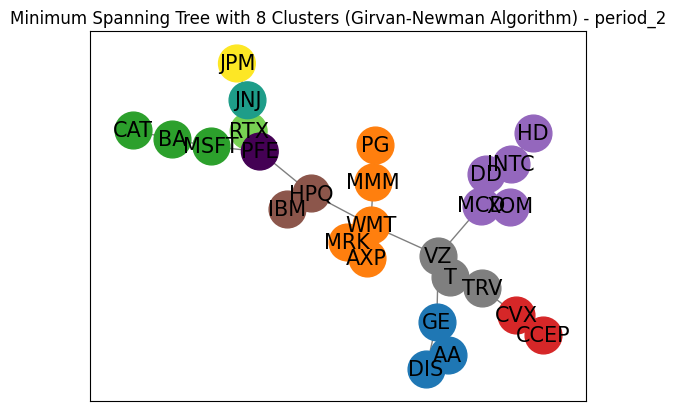

communities:  ({0, 1, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26}, {2, 3, 7, 8, 18, 19, 20})
cluster stocks: {2: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'DD', 'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MMM', 'MRK', 'RTX', 'T', 'TRV', 'VZ', 'WMT', 'XOM'], 2: ['BA', 'CAT', 'DIS', 'GE', 'MSFT', 'PFE', 'PG']}, 4: {}, 8: {}}
breaking


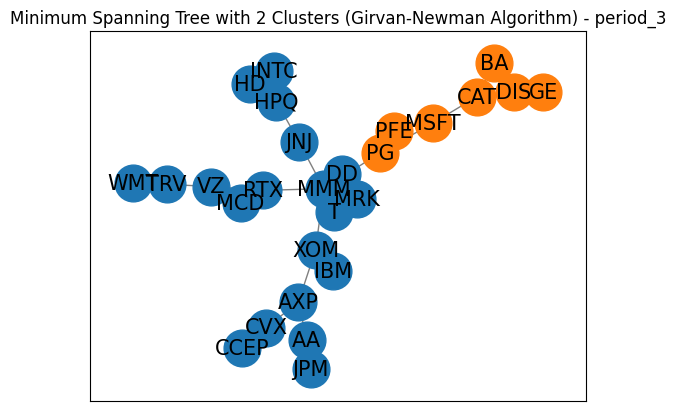

communities:  ({0, 1, 4, 5, 11, 14, 26}, {2, 3, 7, 8, 18, 19, 20}, {6, 9, 10, 12, 13, 15, 16, 17, 21, 22, 23, 24, 25})
cluster stocks: {2: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'DD', 'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MMM', 'MRK', 'RTX', 'T', 'TRV', 'VZ', 'WMT', 'XOM'], 2: ['BA', 'CAT', 'DIS', 'GE', 'MSFT', 'PFE', 'PG']}, 4: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'IBM', 'JPM', 'XOM'], 2: ['BA', 'CAT', 'DIS', 'GE', 'MSFT', 'PFE', 'PG'], 3: ['DD', 'HD', 'HPQ', 'INTC', 'JNJ', 'MCD', 'MMM', 'MRK', 'RTX', 'T', 'TRV', 'VZ', 'WMT']}, 8: {}}
communities:  ({0, 1, 4, 5, 11, 14, 26}, {2, 3, 7, 8, 18, 19, 20}, {6, 9, 10, 12, 13, 16, 17, 22}, {15, 21, 23, 24, 25})
cluster stocks: {2: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'DD', 'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MMM', 'MRK', 'RTX', 'T', 'TRV', 'VZ', 'WMT', 'XOM'], 2: ['BA', 'CAT', 'DIS', 'GE', 'MSFT', 'PFE', 'PG']}, 4: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'IBM', 'JPM', 'XOM'], 2: ['BA', 'CAT', 'DIS', 'GE', 'MSFT', 'PFE', 'PG'], 3: ['DD', 

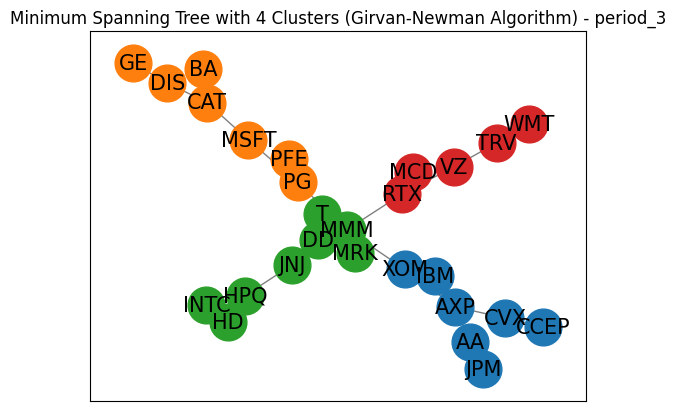

communities:  ({0, 1, 4, 5, 11, 14, 26}, {2, 3, 7, 8, 18, 19, 20}, {16, 17, 6, 22}, {9, 10, 12, 13}, {15, 21, 23, 24, 25})
cluster stocks: {2: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'DD', 'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MMM', 'MRK', 'RTX', 'T', 'TRV', 'VZ', 'WMT', 'XOM'], 2: ['BA', 'CAT', 'DIS', 'GE', 'MSFT', 'PFE', 'PG']}, 4: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'IBM', 'JPM', 'XOM'], 2: ['BA', 'CAT', 'DIS', 'GE', 'MSFT', 'PFE', 'PG'], 3: ['DD', 'HD', 'HPQ', 'INTC', 'JNJ', 'MMM', 'MRK', 'T'], 4: ['MCD', 'RTX', 'TRV', 'VZ', 'WMT']}, 8: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'IBM', 'JPM', 'XOM'], 2: ['BA', 'CAT', 'DIS', 'GE', 'MSFT', 'PFE', 'PG'], 3: ['MMM', 'MRK', 'DD', 'T'], 4: ['HD', 'HPQ', 'INTC', 'JNJ'], 5: ['MCD', 'RTX', 'TRV', 'VZ', 'WMT']}}
communities:  ({0, 1, 4, 5, 11, 14, 26}, {8, 2, 3, 7}, {16, 17, 6, 22}, {9, 10, 12, 13}, {15, 21, 23, 24, 25}, {18, 19, 20})
cluster stocks: {2: {1: ['AA', 'AXP', 'CCEP', 'CVX', 'DD', 'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MMM', '

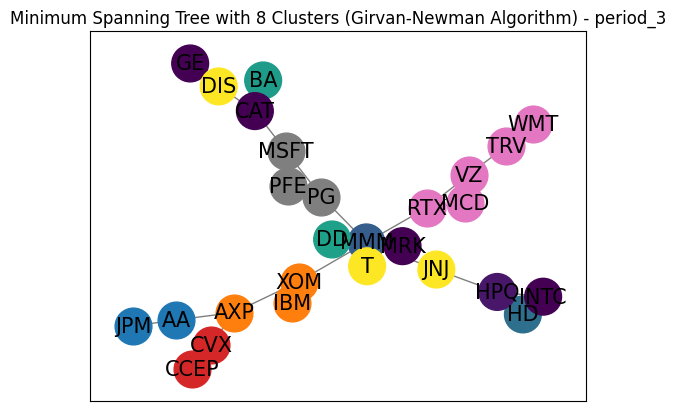

communities:  ({0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 23, 25}, {9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 2: ['HD', 'IBM', 'INTC', 'JNJ', 'MCD', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'T', 'VZ', 'XOM']}, 4: {}, 8: {}}
breaking


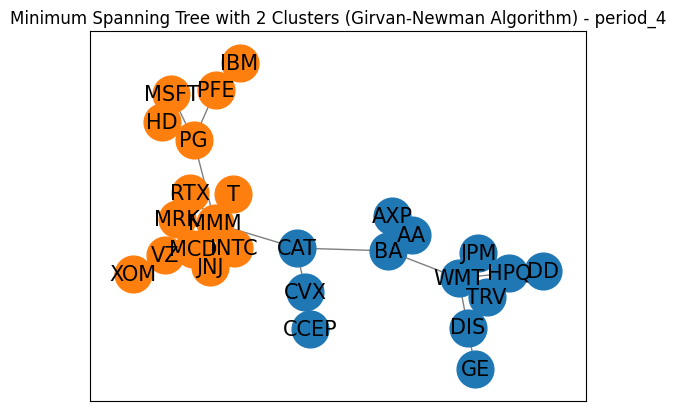

communities:  ({0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 14, 23, 25}, {9, 11, 18, 19, 20}, {12, 13, 15, 16, 17, 21, 22, 24, 26})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 2: ['HD', 'IBM', 'INTC', 'JNJ', 'MCD', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'T', 'VZ', 'XOM']}, 4: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 2: ['HD', 'IBM', 'MSFT', 'PFE', 'PG'], 3: ['INTC', 'JNJ', 'MCD', 'MMM', 'MRK', 'RTX', 'T', 'VZ', 'XOM']}, 8: {}}
communities:  ({0, 1, 2, 3, 4, 5}, {6, 7, 8, 10, 14, 23, 25}, {9, 11, 18, 19, 20}, {12, 13, 15, 16, 17, 21, 22, 24, 26})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 2: ['HD', 'IBM', 'INTC', 'JNJ', 'MCD', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'T', 'VZ', 'XOM']}, 4: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX'], 2: ['DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 3: ['HD', 'IBM', '

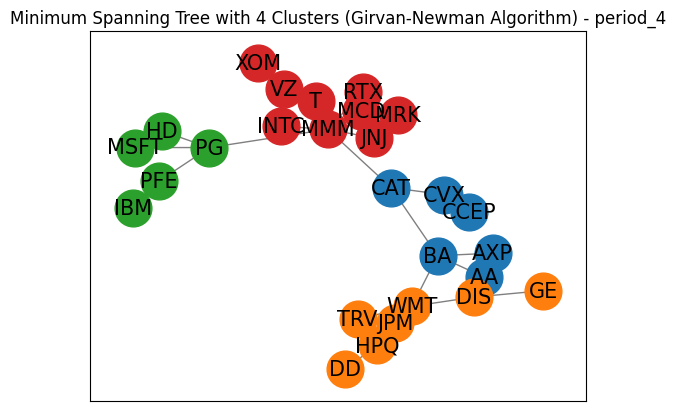

communities:  ({0, 1, 2, 3, 4, 5}, {6, 7, 8, 10, 14, 23, 25}, {9, 11, 18, 19, 20}, {12, 13, 15, 16, 17, 21, 22}, {24, 26})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 2: ['HD', 'IBM', 'INTC', 'JNJ', 'MCD', 'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'RTX', 'T', 'VZ', 'XOM']}, 4: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX'], 2: ['DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 3: ['HD', 'IBM', 'MSFT', 'PFE', 'PG'], 4: ['INTC', 'JNJ', 'MCD', 'MMM', 'MRK', 'RTX', 'T', 'VZ', 'XOM']}, 8: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX'], 2: ['DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 3: ['HD', 'IBM', 'MSFT', 'PFE', 'PG'], 4: ['INTC', 'JNJ', 'MCD', 'MMM', 'MRK', 'RTX', 'T'], 5: ['VZ', 'XOM']}}
communities:  ({0, 1, 2, 3, 4, 5}, {6, 10, 14, 23, 25}, {8, 7}, {9, 11, 18, 19, 20}, {12, 13, 15, 16, 17, 21, 22}, {24, 26})
cluster stocks: {2: {1: ['AA', 'AXP', 'BA', 'CAT', 'CCEP', 'CVX', 'DD', 'DIS', 'GE', 'HPQ', 'JPM', 'TRV', 'WMT'], 2:

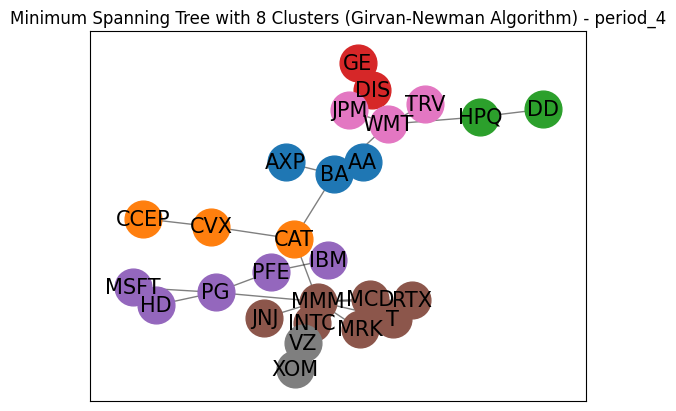

In [105]:
import numpy as np
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from networkx.algorithms.community import girvan_newman

def ultrametric(correlation_matrix, q=2):
    """
    Convert a correlation matrix to an ultrametric distance matrix.

    Parameters:
        correlation_matrix (pd.DataFrame): Correlation matrix of stocks.
        q (float): Exponent parameter (default is 2).

    Returns:
        pd.DataFrame: Ultrametric distance matrix.
    """
    # Calculate the ultrametric distance matrix
    ultrametric_distances = q * (1 - correlation_matrix) ** (1/q)
    
    return ultrametric_distances

def generate_portfolios(communities, labels, num_portfolios=100):
    """Generate multiple portfolios by selecting one ticker at random from each cluster."""
    portfolios = []
    for _ in range(num_portfolios):
        portfolio = [random.choice(list([labels[node] for node in community])) for community in communities]
        portfolios.append(portfolio)
    return portfolios

def plot_MST_portfolios(G, num_clusters, period, communities, labels):
        # Plot the graph with clusters colored
        pos = nx.spring_layout(G)
        for i, community in enumerate(communities):
            nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=plt.cm.tab10(i), node_size=700, label=f'Cluster {i+1}')
        nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
        plt.title(f"Minimum Spanning Tree with {num_clusters} Clusters (Girvan-Newman Algorithm) - {period}")
        plt.show()


def MST_cluster(distance_matrix, labels, period):
    sparse_matrix = csr_matrix(distance_matrix)

    # Compute the minimum spanning tree
    mst = minimum_spanning_tree(sparse_matrix)

    # Create a NetworkX graph from the MST
    G = nx.Graph(mst.toarray().astype(float))

    # Use the Girvan-Newman algorithm to find communities
    communities_generator = girvan_newman(G)

    cluster_stocks = {num_clusters: {} for num_clusters in [2, 4, 8]}

    for num_clusters in [2, 4, 8]:
        for communities in communities_generator:
            for comm_num, community in enumerate(communities, start=1):
                cluster_stocks[num_clusters][comm_num] = [labels[t] for t in community]    
            print("communities: ", communities)
            print("cluster stocks:", cluster_stocks)
            if len(communities) == num_clusters:
                print("breaking")
                break
        
        #plot
        plot_MST_portfolios(G, num_clusters, period, communities, labels)
    return cluster_stocks
        
# Convert new correlation matrices to distance matrices using ultrametric function
distance_matrices = {}
for period, correlation_matrix in correlation_matrices.items():
    distance_matrices[period] = ultrametric(correlation_matrix)

all_cluster_stocks = {}
tickers = sorted(set(index[0] for index in distance_matrix))
print("all tickers: ", tickers)
labels = {i: ticker for i, ticker in enumerate(tickers)}
print("ticker labels:", labels)
for period, distance_matrix in distance_matrices.items():
    all_cluster_stocks[period] = MST_cluster(distance_matrix.values, labels, period)

In [106]:
#CLUSTERS

import pandas as pd
import numpy as np

def calculate_metrics_for_mst_clusters(all_cluster_stocks, period_dfs):
    results_by_period = {}
    num_portfolios = 100
    
    for period, cluster_stocks in all_cluster_stocks.items():
        returns_data = period_dfs[period].droplevel(1, axis=1)
        results_by_cluster = {}
        selected_stocks_list = {}
        #print(returns_data)
        
        for num_clusters, clusters in cluster_stocks.items():
            cluster_lists = list(clusters.values())
            std_returns = []
            portfolio_returns = []
            #print(cluster_lists)
            correlations = []
            
            for _ in range(num_portfolios):
                # First, choose stocks from each cluster
                selected_stocks = [np.random.choice(cluster_list, size=1)[0] for cluster_list in cluster_lists]
                try:
                    selected_stocks_list[num_clusters] = np.concatenate([selected_stocks_list[num_clusters], selected_stocks])
                except KeyError:
                    selected_stocks_list[num_clusters] = selected_stocks
                portfolio_return_stocks = returns_data[selected_stocks].mean(axis=1)
                
                
                mean_portfolio_return = np.prod(1+portfolio_return_stocks)-1
                portfolio_returns.append(mean_portfolio_return)
                mean_std = (portfolio_return_stocks+1).std()
                std_returns.append(mean_std)
                
                correlation_matrix = returns_data[selected_stocks].corr()
                upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                upper_triangle_flat = upper_triangle.stack().dropna().tolist()
                mean_correlation = np.mean(upper_triangle_flat)
                correlations.append(mean_correlation)
            plt.show()
            
            sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(std_returns))
            mean_return = np.mean(portfolio_returns)
            mean_std = np.mean(std_returns)
            average_correlation = np.mean(correlations)
            
            final_stocks_list = [list(i) for i in selected_stocks_list.values()]
            
            results_by_cluster[num_clusters] = {'Mean': mean_return, 'SD': mean_std, 'Sharpe': sharpe_ratio, 'Correlation': average_correlation, "Stocks" : final_stocks_list}
            #print()
        results_by_period[period] = results_by_cluster
    return results_by_period




results_by_period = calculate_metrics_for_mst_clusters(all_cluster_stocks, period_dfs)
dfs = []
for period, results_by_cluster in results_by_period.items():
    for num_clusters, metrics in results_by_cluster.items():
        # Flatten or stringify the complex 'Stocks' list for display
        metrics_for_df = {key: (', '.join(map(str, val)) if isinstance(val, list) else val) for key, val in metrics.items()}
        df = pd.DataFrame([metrics_for_df], index=[f"{period} ({num_clusters} stocks)"])
        dfs.append(df)

result_df_clusters = pd.concat(dfs)
result_df_clusters


,Mean,SD,Sharpe,Correlation,Stocks
period_1 (2 stocks),-0.024375,0.037556,-0.063098,0.333577,"['CCEP', 'T', 'CVX', 'GE', 'CCEP', 'WMT', 'AXP..."
period_1 (4 stocks),0.002622,0.033370,0.006817,0.355692,"['CCEP', 'T', 'CVX', 'GE', 'CCEP', 'WMT', 'AXP..."
period_1 (8 stocks),0.027998,0.031669,0.090112,0.378690,"['CCEP', 'T', 'CVX', 'GE', 'CCEP', 'WMT', 'AXP..."
period_2 (2 stocks),0.241135,0.021518,1.192576,0.242918,"['CCEP', 'MMM', 'XOM', 'IBM', 'TRV', 'IBM', 'V..."
period_2 (4 stocks),0.257324,0.018415,1.446237,0.260819,"['CCEP', 'MMM', 'XOM', 'IBM', 'TRV', 'IBM', 'V..."
period_2 (8 stocks),0.275018,0.016233,1.704336,0.235675,"['CCEP', 'MMM', 'XOM', 'IBM', 'TRV', 'IBM', 'V..."
period_3 (2 stocks),-0.056911,0.042731,-0.108733,0.517761,"['MRK', 'MSFT', 'WMT', 'PFE', 'HPQ', 'PG', 'JN..."
period_3 (4 stocks),0.005867,0.038853,0.033732,0.488238,"['MRK', 'MSFT', 'WMT', 'PFE', 'HPQ', 'PG', 'JN..."
period_3 (8 stocks),0.008012,0.039778,0.022748,0.505909,"['MRK', 'MSFT', 'WMT', 'PFE', 'HPQ', 'PG', 'JN..."
period_4 (2 stocks),0.463210,0.026621,1.904054,0.488676,"['CVX', 'JNJ', 'DD', 'RTX', 'DIS', 'IBM', 'DD'..."


In [107]:
def calculate_metrics_for_random_selection(period_dfs, num_stocks_list):
    results_by_period = {}
    num_portfolios = 100
 
    for period, returns_data in period_dfs.items():
        returns_data = returns_data.droplevel(1, axis=1)
        # print(returns_data)
        results_by_stocks = {}
        stocks_length_list = {}
        #print(returns_data)
        
        for num_stocks in num_stocks_list:
            std_returns = []
            portfolio_returns = []
            correlation = []
            selected_stocks_list = {}
            
            for _ in range(num_portfolios):
                selected_stocks = np.random.choice(returns_data.columns, size=num_stocks, replace=False)
                
                try:
                    selected_stocks_list[num_stocks] = np.concatenate([selected_stocks_list[num_stocks], selected_stocks])
                except KeyError:
                    selected_stocks_list[num_stocks] = selected_stocks
               
                
                portfolio_return_stocks = returns_data[selected_stocks].mean(axis=1)
                mean_portfolio_return = np.prod(1+portfolio_return_stocks)-1
                portfolio_returns.append(mean_portfolio_return)
                
                
                mean_std = (portfolio_return_stocks).std()
                std_returns.append(mean_std)
                
                correlation_matrix = returns_data[selected_stocks].corr()
                upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                upper_triangle_flat = upper_triangle.stack().dropna().tolist()
                mean_correlation = np.mean(upper_triangle_flat)
                correlation.append(mean_correlation)
            
            #stocks_length_list[period] = selected_stocks_list
            
            sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(std_returns))
            mean_return = np.mean(portfolio_returns)
            mean_std = np.mean(std_returns)
            final_stocks_list = [list(i) for i in selected_stocks_list.values()]
            mean_correlations = np.mean(correlation)
            
            results_by_stocks[num_stocks] = {'Mean': mean_return, 'SD': mean_std, 'Sharpe': sharpe_ratio, 'Correlation': mean_correlations, "Stocks" : final_stocks_list}

        results_by_period[period] = results_by_stocks
    
    return results_by_period

num_stocks_list = [2, 4, 8]

results_by_period = calculate_metrics_for_random_selection(period_dfs, num_stocks_list)

dfs = []
for period, results_by_stocks in results_by_period.items():
    for num_stocks, metrics in results_by_stocks.items():
        df = pd.DataFrame(metrics, index=[f"{period} ({num_stocks} stocks)"])
        dfs.append(df)

result_df_random = pd.concat(dfs)
result_df_random

,Mean,SD,Sharpe,Correlation,Stocks
period_1 (2 stocks),0.016748,0.038071,0.061851,0.342089,"[JPM, AA, INTC, MCD, IBM, PFE, PFE, GE, VZ, AX..."
period_1 (4 stocks),0.053809,0.032062,0.175150,0.354770,"[CVX, CCEP, XOM, INTC, CAT, IBM, PFE, TRV, MMM..."
period_1 (8 stocks),0.040225,0.030384,0.135260,0.361875,"[MCD, GE, INTC, RTX, XOM, CVX, CAT, PFE, JPM, ..."
period_2 (2 stocks),0.277211,0.022122,1.291687,0.254389,"[XOM, T, BA, CAT, CCEP, CAT, IBM, BA, XOM, T, ..."
period_2 (4 stocks),0.235435,0.018001,1.337838,0.231728,"[DIS, AA, CAT, VZ, RTX, PG, MCD, JPM, CCEP, HD..."
period_2 (8 stocks),0.250699,0.016036,1.583874,0.247949,"[DIS, MSFT, GE, HD, VZ, T, CAT, MMM, MRK, XOM,..."
period_3 (2 stocks),-0.029439,0.044231,-0.033785,0.513288,"[JPM, MRK, MMM, TRV, DIS, CVX, CVX, T, BA, T, ..."
period_3 (4 stocks),0.005067,0.039510,0.029285,0.506788,"[JPM, AA, DD, DIS, CVX, DIS, CAT, XOM, WMT, MM..."
period_3 (8 stocks),0.010679,0.038022,0.033519,0.503752,"[GE, MSFT, XOM, JNJ, T, TRV, BA, HD, MCD, CVX,..."
period_4 (2 stocks),0.383194,0.028886,1.446475,0.485064,"[CCEP, AA, IBM, AXP, MRK, DD, CCEP, MMM, PG, X..."


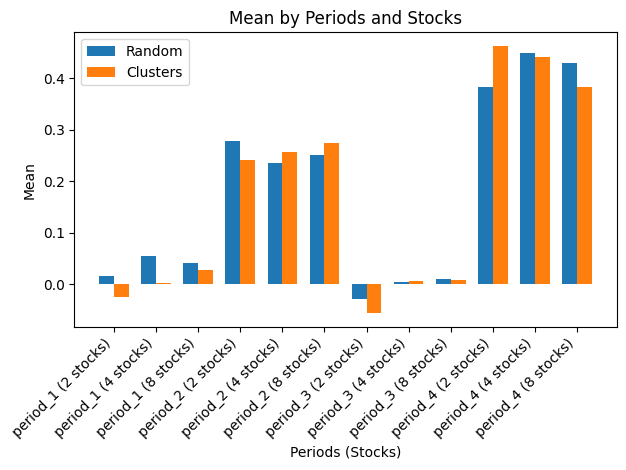

Total Average Mean of Random Values: 0.17675456928220887
Total Average Mean of Cluster Values: 0.16860881306527806

Period 1 Average Mean of Random Values: 0.03692760378795993
Period 1 Average Mean of Cluster Values: 0.002081766389286307
Period 2 Average Mean of Random Values: 0.25444817581705387
Period 2 Average Mean of Cluster Values: 0.2578256176548714
Period 3 Average Mean of Random Values: -0.004564366444541392
Period 3 Average Mean of Cluster Values: -0.014344004731251367


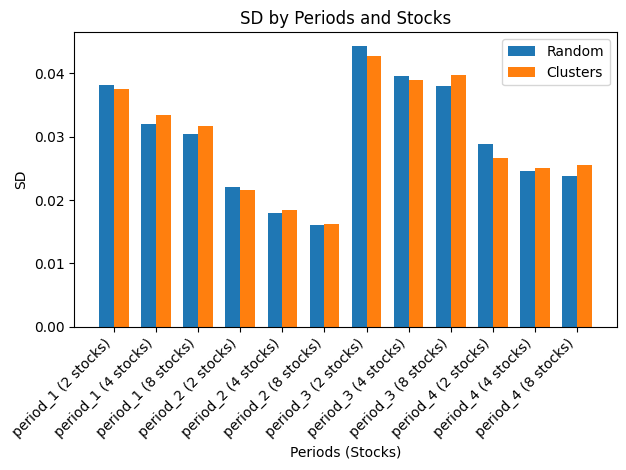

Total Average SD of Random Values: 0.029632058781240533
Total Average SD of Cluster Values: 0.02978494975543494

Period 1 Average SD of Random Values: 0.03350528941093368
Period 1 Average SD of Cluster Values: 0.03419821056155822
Period 2 Average SD of Random Values: 0.018719739365418347
Period 2 Average SD of Cluster Values: 0.01872225866485878
Period 3 Average SD of Random Values: 0.04058752332947851
Period 3 Average SD of Cluster Values: 0.04045384916458743


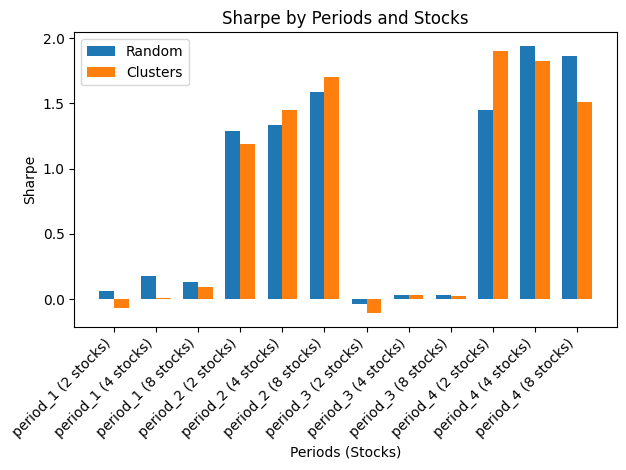

Total Average Sharpe of Random Values: 0.821991068774684
Total Average Sharpe of Cluster Values: 0.797311829716261

Period 1 Average Sharpe of Random Values: 0.12408687378998721
Period 1 Average Sharpe of Cluster Values: 0.011276816696984297
Period 2 Average Sharpe of Random Values: 1.4044667064701215
Period 2 Average Sharpe of Cluster Values: 1.4477161532749523
Period 3 Average Sharpe of Random Values: 0.009672877781440168
Period 3 Average Sharpe of Cluster Values: -0.017417612314735566


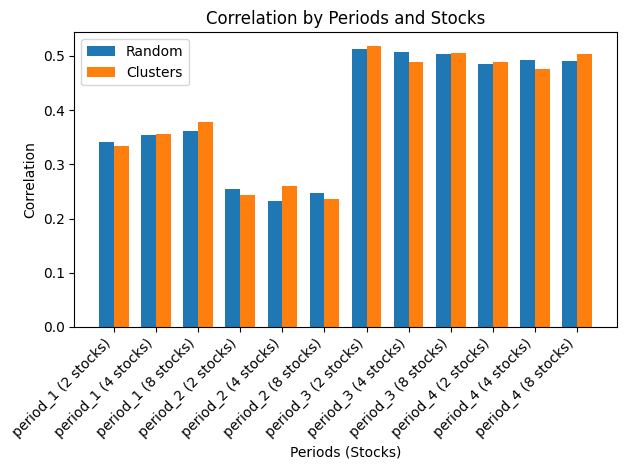

Total Average Correlation of Random Values: 0.39873275505641753
Total Average Correlation of Cluster Values: 0.39893239645639483

Period 1 Average Correlation of Random Values: 0.35291132014777515
Period 1 Average Correlation of Cluster Values: 0.3559865900866221
Period 2 Average Correlation of Random Values: 0.24468839771208048
Period 2 Average Correlation of Cluster Values: 0.24647027878696193
Period 3 Average Correlation of Random Values: 0.5079424763705526
Period 3 Average Correlation of Cluster Values: 0.5039697088776431


In [108]:
def plot_metric(metric_name):
    labels = list(result_df_random.index)
    
    random_values = [result_df_random.loc[label][metric_name] for label in labels]
    cluster_values = [result_df_clusters.loc[label][metric_name] for label in labels]

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, random_values, width, label='Random')
    rects2 = ax.bar([i + width for i in x], cluster_values, width, label='Clusters')

    ax.set_xlabel('Periods (Stocks)')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} by Periods and Stocks')
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()

    plt.show()

    #print(random_values)
    #print(cluster_values)
    
    print("Total Average " + metric_name + " of Random Values:", np.mean(random_values))
    print("Total Average " + metric_name + " of Cluster Values:", np.mean(cluster_values))
    print()
    periods = ["Period 1", "Period 2", "Period 3"]  # Update with your periods
    for period_num, period_label in enumerate(periods, start=1):
        print(period_label + " Average " + metric_name + " of Random Values:", np.mean(random_values[(period_num - 1) * 3:period_num * 3]))
        print(period_label + " Average " + metric_name + " of Cluster Values:", np.mean(cluster_values[(period_num - 1) * 3:period_num * 3]))

# Plotting Mean
plot_metric('Mean')

# Plotting SD
plot_metric('SD')

# Plotting Sharpe
plot_metric('Sharpe')

# Plotting Correlation
plot_metric('Correlation')

Out of Sample Analysis

In [110]:
#CLUSTERS

import pandas as pd
import numpy as np

def calculate_out_sample_metrics_for_mst_clusters(all_cluster_stocks, period_dfs):
    results_by_period = {}
    num_portfolios = 100
    
    for period, cluster_stocks in all_cluster_stocks.items():
        returns_data = period_dfs[period].droplevel(1, axis=1)
        results_by_cluster = {}
        selected_stocks_list = {}
        #print(returns_data)
        
        for num_clusters, clusters in cluster_stocks.items():
            cluster_lists = list(clusters.values())
            std_returns = []
            portfolio_returns = []
            #print(cluster_lists)
            correlations = []
            
            for _ in range(num_portfolios):
                # First, choose stocks from each cluster
                selected_stocks = [np.random.choice(cluster_list, size=1)[0] for cluster_list in cluster_lists]
                try:
                    selected_stocks_list[num_clusters] = np.concatenate([selected_stocks_list[num_clusters], selected_stocks])
                except KeyError:
                    selected_stocks_list[num_clusters] = selected_stocks
                portfolio_return_stocks = returns_data[selected_stocks].mean(axis=1)
                
                
                mean_portfolio_return = np.prod(1+portfolio_return_stocks)-1
                portfolio_returns.append(mean_portfolio_return)
                mean_std = (portfolio_return_stocks+1).std()
                std_returns.append(mean_std)
                
                correlation_matrix = returns_data[selected_stocks].corr()
                upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                upper_triangle_flat = upper_triangle.stack().dropna().tolist()
                mean_correlation = np.mean(upper_triangle_flat)
                correlations.append(mean_correlation)
            plt.show()
            
            sharpe_ratio = np.mean((np.array(portfolio_returns)/10) / np.array(std_returns))
            mean_return = np.mean(portfolio_returns)
            mean_std = np.mean(std_returns)
            average_correlation = np.mean(correlations)
            
            final_stocks_list = [list(i) for i in selected_stocks_list.values()]
            
            results_by_cluster[num_clusters] = {'Mean': mean_return, 'SD': mean_std, 'Sharpe': sharpe_ratio, 'Correlation': average_correlation, "Stocks" : final_stocks_list}
            #print()
        results_by_period[period] = results_by_cluster
    return results_by_period




results_by_period = calculate_metrics_for_mst_clusters(all_cluster_stocks, period_dfs)
dfs = []
for period, results_by_cluster in results_by_period.items():
    for num_clusters, metrics in results_by_cluster.items():
        # Flatten or stringify the complex 'Stocks' list for display
        metrics_for_df = {key: (', '.join(map(str, val)) if isinstance(val, list) else val) for key, val in metrics.items()}
        df = pd.DataFrame([metrics_for_df], index=[f"{period} ({num_clusters} stocks)"])
        dfs.append(df)

result_df_clusters = pd.concat(dfs)
result_df_clusters


ValueError: a must be 1-dimensional or an integer

In [109]:
total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_clusters.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Plot the pie chart for all periods combined
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('All Stocks - All Periods Combined')
plt.show()

total_counts_df = pd.DataFrame(index=custom_tickers)

# Iterate over each period
for period, group in result_df_random.groupby(level=0):
    # Create an empty DataFrame to store counts for the current period
    counts_df = pd.DataFrame(index=custom_tickers)

    # Count occurrences of each ticker in the current period
    ticker_counts = pd.Series(group["Stocks"].sum()).value_counts()
    counts_df[period] = ticker_counts.reindex(custom_tickers, fill_value=0)

    # Sum the counts across tickers for the current period
    total_counts_df[period] = counts_df.sum(axis=1)

# Sum the counts across all periods
total_counts = total_counts_df.sum(axis=1)

# Sort the total counts in descending order
total_counts_sorted = total_counts.sort_values(ascending=False)

# Plot the bar chart for all periods combined
plt.figure(figsize=(10, 6))
total_counts_sorted.plot(kind='bar')
plt.xlabel('Stock')
plt.ylabel('Count')
plt.title('Total Counts of Each Stock Across All Periods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3229: RuntimeWarning: divide by zero encountered in divide
  x = x / sx
/Users/costanzasiniscalchi/miniconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3229: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 800x800 with 1 Axes>